In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold

from sklearn.metrics import roc_auc_score, accuracy_score

In [2]:
os.chdir('/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Datasets/')
all_patients = pd.read_csv('df_all_patients_IDS.csv')

In [3]:
train_ids = [ 'P10','P15','P16',
             'P20','P21','P21', 'P21',
             'P27', 'P24', 'P26',
              'P5', 'P17', 'P28', 'P28', 'P6'] #'P5 N1', 'P17 N1',
            

test_ids = ['P7', 'P1']

all_ids = [ 'P6 N1', 'P21 N1', 'P21 N2', 'P21 N3', 'P20 N1', 'P16 N1', 'P10 N1',
                   'P1 N1', 'P26 N2', 'P27 N1', 'P17 N1', 'P24 N1', 'P5 N1','P7 N1', 'P28 N1', 'P28 N2']
len(all_ids)

16

In [4]:
#all_patients['Patient_ID'] = patient_id_column

column_to_move = 'Patient_ID'
new_column_order = [column_to_move] + [col for col in all_patients.columns if col != column_to_move]

# Reassign the DataFrame's columns using this new order
all_patients = all_patients[new_column_order]
all_patients

,Patient_ID,Unnamed: 0,Genotype,Hurst_E1,Hurst_E2,Hurst_O1,Hurst_C3,Hurst_F3,Hurst_M2,Dispen_E1,...,E2_F3_phase_lock,E2_C3_phase_lock,E2_O1_phase_lock,E2_M2_phase_lock,F3_C3_phase_lock,F3_O1_phase_lock,F3_M2_phase_lock,C3_O1_phase_lock,C3_M2_phase_lock,O1_M2_phase_lock
0,P6,0,1,3.262335,3.939851,4.202927,4.024169,3.914120,4.701832,2.081332,...,0.131191,0.160906,0.028797,0.044730,0.059119,0.100674,0.162270,0.038602,0.662702,0.201518
1,P6,1,1,-0.393308,0.758725,0.565811,0.662099,0.650113,0.615971,2.366289,...,0.141938,0.139012,0.033578,0.044440,0.061324,0.076790,0.167004,0.054018,0.676922,0.187127
2,P6,2,1,-1.492526,0.701736,0.549797,0.588715,0.609258,0.531938,2.463711,...,0.114935,0.176147,0.028737,0.054153,0.069330,0.067405,0.126345,0.045793,0.684068,0.182023
3,P6,3,1,-0.767541,0.738484,0.558011,0.485269,0.475022,0.479210,2.438271,...,0.048777,0.145820,0.031422,0.051468,0.067250,0.067823,0.110469,0.053287,0.687971,0.162106
4,P6,4,1,-3.608446,0.664564,0.444736,0.485577,0.455710,0.450246,2.441381,...,0.105989,0.199312,0.023620,0.062880,0.029902,0.068079,0.123423,0.048230,0.684389,0.144952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,P28,3567,0,1.011602,0.445987,0.602566,0.589067,0.443827,0.530432,2.297590,...,0.033722,0.171985,0.075585,0.230777,0.429384,0.353852,0.069761,0.167856,0.314116,0.460712
3568,P28,3568,0,0.953962,0.481252,0.650899,0.642726,0.531036,0.565655,2.209516,...,0.007580,0.184549,0.069532,0.216088,0.432927,0.349865,0.079424,0.149430,0.292945,0.433388
3569,P28,3569,0,0.964713,0.499629,0.598202,0.605621,0.500773,0.505756,2.236090,...,0.024629,0.192478,0.075815,0.204453,0.437592,0.339216,0.072066,0.156285,0.283497,0.451280
3570,P28,3570,0,-3.903140,0.590368,0.656417,0.634468,0.583174,0.515904,1.583559,...,0.035864,0.191338,0.082433,0.181427,0.412056,0.330528,0.070924,0.185784,0.309707,0.435668


In [5]:
all_patients.loc[all_patients['Patient_ID'] == 'P1']

,Patient_ID,Unnamed: 0,Genotype,Hurst_E1,Hurst_E2,Hurst_O1,Hurst_C3,Hurst_F3,Hurst_M2,Dispen_E1,...,E2_F3_phase_lock,E2_C3_phase_lock,E2_O1_phase_lock,E2_M2_phase_lock,F3_C3_phase_lock,F3_O1_phase_lock,F3_M2_phase_lock,C3_O1_phase_lock,C3_M2_phase_lock,O1_M2_phase_lock
1258,P1,1258,0,5.618996,4.948972,4.477053,4.668170,3.917417,4.512415,0.678432,...,0.114246,0.460349,0.136559,0.235614,0.268005,0.361783,0.219175,0.312056,0.317614,0.463639
1259,P1,1259,0,1.124914,0.637460,0.850732,0.796270,0.684166,0.799780,3.103962,...,0.115528,0.465072,0.133731,0.232786,0.268475,0.368201,0.222661,0.308772,0.323628,0.464346
1260,P1,1260,0,1.105576,0.663885,0.778923,0.731726,0.693960,0.759311,3.023147,...,0.118392,0.459087,0.132982,0.240997,0.267668,0.376463,0.214867,0.312665,0.314715,0.473112
1261,P1,1261,0,1.092913,0.707510,0.778047,0.724703,0.698831,0.725025,3.171994,...,0.102945,0.451525,0.143173,0.248314,0.260366,0.379929,0.229108,0.324209,0.300504,0.472624
1262,P1,1262,0,0.533325,0.664026,0.728169,0.688491,0.684062,0.707851,2.518155,...,0.112550,0.444778,0.143806,0.251817,0.278106,0.383810,0.229667,0.322901,0.308595,0.475708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,P1,1780,0,-0.641431,0.479724,0.417496,0.522126,0.495566,0.427954,2.445885,...,0.092571,0.444161,0.196231,0.282378,0.269144,0.389538,0.228054,0.288247,0.242208,0.484645
1781,P1,1781,0,-3.664590,0.520433,0.493955,0.547833,0.532677,0.526516,2.634169,...,0.087999,0.456527,0.212917,0.323486,0.290489,0.426977,0.229751,0.308282,0.270631,0.496142
1782,P1,1782,0,-1.109314,0.696993,0.713016,0.723078,0.691857,0.713808,2.549532,...,0.066233,0.472378,0.214538,0.325432,0.308320,0.438794,0.219221,0.287197,0.279669,0.484898
1783,P1,1783,0,0.213996,0.444435,0.427139,3.665059,0.443198,0.437067,1.962813,...,0.093872,0.431126,0.165435,0.295399,0.305241,0.335588,0.211384,0.308990,0.289836,0.431497


In [5]:
df_clean = all_patients.drop(['Unnamed: 0'], axis = 1)
accepted_features = ['Patient_ID', 'Genotype', 'delta_M2', 'E2_C3_phase_lock', 'E2_M2_cross_corr', 'E2_O1_phase_lock',
                     'F3_C3_phase_lock', 'C3_O1_cross_corr', 'Hurst_F3', 'C3_M2_cross_corr',
                     'F3_M2_cross_corr', 'E1_M2_phase_lock', 'E1_E2_cross_corr',
                     'F3_O1_cross_corr', 'Exp_C3', 'E1_C3_cross_corr', 'E2_O1_cross_corr',
                     'E2_F3_cross_corr', 'theta_F3', 'E2_F3_phase_lock', 'C3_M2_phase_lock',
                     'beta_O1', 'E1_O1_cross_corr', 'E2_M2_phase_lock', 'E1_M2_cross_corr', 
                     'E1_F3_cross_corr', 'Hurst_E1', 'delta_E1', 'Dispen_O1', 'Dispen_E1',
                     'F3_C3_cross_corr', 'O1_M2_cross_corr', 'F3_M2_phase_lock', 'Hurst_O1',
                     'O1_M2_phase_lock', 'Exp_E2']

In [6]:
df_acc = df_clean[accepted_features]
df_acc

,Patient_ID,Genotype,delta_M2,E2_C3_phase_lock,E2_M2_cross_corr,E2_O1_phase_lock,F3_C3_phase_lock,C3_O1_cross_corr,Hurst_F3,C3_M2_cross_corr,...,Hurst_E1,delta_E1,Dispen_O1,Dispen_E1,F3_C3_cross_corr,O1_M2_cross_corr,F3_M2_phase_lock,Hurst_O1,O1_M2_phase_lock,Exp_E2
0,P6,1,9.645901e-10,0.160906,0.303189,0.028797,0.059119,0.120117,3.914120,0.664621,...,3.262335,1.988457e-08,2.257134,2.081332,0.148115,0.241838,0.162270,4.202927,0.201518,1.894471
1,P6,1,3.206802e-11,0.139012,0.316757,0.033578,0.061324,0.089168,0.650113,0.650114,...,-0.393308,7.315911e-09,2.481733,2.366289,0.144719,0.244060,0.167004,0.565811,0.187127,1.617436
2,P6,1,4.128374e-11,0.176147,0.303387,0.028737,0.069330,0.096782,0.609258,0.651325,...,-1.492526,4.472304e-09,2.163391,2.463711,0.114142,0.227899,0.126345,0.549797,0.182023,2.067435
3,P6,1,1.360080e-10,0.145820,0.286855,0.031422,0.067250,0.120007,0.475022,0.647971,...,-0.767541,2.357559e-09,2.396920,2.438271,0.096173,0.212221,0.110469,0.558011,0.162106,2.166088
4,P6,1,2.916348e-10,0.199312,0.282001,0.023620,0.029902,0.147441,0.455710,0.636054,...,-3.608446,2.554767e-09,2.485109,2.441381,0.079834,0.208362,0.123423,0.444736,0.144952,1.121276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,P28,0,5.031589e-13,0.171985,0.170936,0.075585,0.429384,0.149043,0.443827,0.375630,...,1.011602,7.274640e-11,1.873222,2.297590,0.460769,0.610124,0.069761,0.602566,0.460712,2.662924
3568,P28,0,5.272093e-13,0.184549,0.156482,0.069532,0.432927,0.140424,0.531036,0.359208,...,0.953962,1.882400e-10,1.801913,2.209516,0.456824,0.579903,0.079424,0.650899,0.433388,2.962373
3569,P28,0,8.083328e-13,0.192478,0.145896,0.075815,0.437592,0.136281,0.500773,0.358823,...,0.964713,5.260754e-11,1.889183,2.236090,0.453288,0.571854,0.072066,0.598202,0.451280,2.841159
3570,P28,0,5.013517e-13,0.191338,0.141492,0.082433,0.412056,0.135339,0.583174,0.377865,...,-3.903140,6.338179e-09,1.756959,1.583559,0.437032,0.612486,0.070924,0.656417,0.435668,2.628105


In [7]:
X_train = df_acc[df_acc['Patient_ID'].isin(train_ids)]
X_test = df_acc[df_acc['Patient_ID'].isin(test_ids)]
y_train = X_train.iloc[:, 1]
y_test = X_test.iloc[:, 1]

In [8]:
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
#X_test_res, y_test_res = oversample.fit_resample(X_test, y_test)
X_train_new = X_train_res.iloc[:, 2:]
X_test_new = X_test.iloc[:, 2:]

## Genotype Splits 

In [42]:
X_test.loc[X_test['Genotype'] == 1]

,Patient_ID,Genotype,delta_M2,E2_C3_phase_lock,E2_M2_cross_corr,E2_O1_phase_lock,F3_C3_phase_lock,C3_O1_cross_corr,Hurst_F3,C3_M2_cross_corr,...,Hurst_E1,delta_E1,Dispen_O1,Dispen_E1,F3_C3_cross_corr,O1_M2_cross_corr,F3_M2_phase_lock,Hurst_O1,O1_M2_phase_lock,Exp_E2
2694,P7,1,5.005144e-10,0.329950,0.094114,0.296553,0.108190,0.125945,0.632091,0.122850,...,3.659402,1.184383e-08,2.569905,2.616966,0.094913,0.298091,0.056258,0.571155,0.326294,1.284934
2695,P7,1,1.800675e-10,0.304800,0.088134,0.308584,0.094477,0.140901,0.811456,0.126484,...,-2.248542,9.621900e-10,2.278125,2.123537,0.061978,0.285568,0.052326,0.585142,0.333275,1.869531
2696,P7,1,6.317633e-11,0.364734,0.102355,0.250185,0.150288,0.110479,3.070744,0.163968,...,1.003368,4.765151e-10,1.510927,2.347421,0.085276,0.268100,0.033200,1.076431,0.364890,2.627628
2697,P7,1,2.573379e-10,0.368099,0.114720,0.291841,0.135531,0.120039,0.784357,0.171750,...,-1.228075,6.109932e-09,2.505614,2.541774,0.083792,0.267873,0.046713,0.669486,0.359585,1.673905
2698,P7,1,5.673610e-11,0.355839,0.139551,0.246058,0.097255,0.151057,0.640201,0.208702,...,-1.460639,3.395378e-09,2.305448,1.814617,0.093146,0.273081,0.012565,0.716906,0.355783,2.427908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,P7,1,7.785788e-11,0.380771,0.080577,0.270678,0.118731,0.077045,0.417878,0.148727,...,0.201688,1.732571e-10,3.789637,2.137268,0.194627,0.399438,0.033101,0.358697,0.368049,0.439316
3135,P7,1,1.876299e-10,0.377994,0.104195,0.296098,0.139669,0.082933,0.260057,0.185680,...,0.617050,3.026702e-09,3.239957,2.717536,0.159869,0.402796,0.049224,0.825039,0.367054,0.397206
3136,P7,1,2.125767e-10,0.361443,0.075238,0.261013,0.167763,0.098100,0.378514,0.107162,...,0.422492,2.297423e-09,3.666186,2.863581,0.132629,0.402359,0.066123,0.459197,0.425129,0.947729
3137,P7,1,2.373747e-10,0.350971,0.136549,0.273858,0.130207,0.082091,0.443968,0.120115,...,0.455297,5.012754e-09,3.690007,2.875658,0.127475,0.353250,0.084374,0.414701,0.376235,1.046378


In [35]:
X_train_res.loc[X_train_res['Genotype'] == 1]

,Patient_ID,Genotype,delta_M2,E2_C3_phase_lock,E2_M2_cross_corr,E2_O1_phase_lock,F3_C3_phase_lock,C3_O1_cross_corr,Hurst_F3,C3_M2_cross_corr,...,Hurst_E1,delta_E1,Dispen_O1,Dispen_E1,F3_C3_cross_corr,O1_M2_cross_corr,F3_M2_phase_lock,Hurst_O1,O1_M2_phase_lock,Exp_E2
0,P6,1,9.645901e-10,0.160906,0.303189,0.028797,0.059119,0.120117,3.914120,0.664621,...,3.262335,1.988457e-08,2.257134,2.081332,0.148115,0.241838,0.162270,4.202927,0.201518,1.894471
1,P6,1,3.206802e-11,0.139012,0.316757,0.033578,0.061324,0.089168,0.650113,0.650114,...,-0.393308,7.315911e-09,2.481733,2.366289,0.144719,0.244060,0.167004,0.565811,0.187127,1.617436
2,P6,1,4.128374e-11,0.176147,0.303387,0.028737,0.069330,0.096782,0.609258,0.651325,...,-1.492526,4.472304e-09,2.163391,2.463711,0.114142,0.227899,0.126345,0.549797,0.182023,2.067435
3,P6,1,1.360080e-10,0.145820,0.286855,0.031422,0.067250,0.120007,0.475022,0.647971,...,-0.767541,2.357559e-09,2.396920,2.438271,0.096173,0.212221,0.110469,0.558011,0.162106,2.166088
4,P6,1,2.916348e-10,0.199312,0.282001,0.023620,0.029902,0.147441,0.455710,0.636054,...,-3.608446,2.554767e-09,2.485109,2.441381,0.079834,0.208362,0.123423,0.444736,0.144952,1.121276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,P26,1,1.008094e-13,0.280820,0.343195,0.126158,0.498232,0.173390,0.704836,0.204573,...,0.664288,7.397880e-11,1.801942,3.946739,0.175468,0.409152,0.338452,0.793088,0.399419,2.234228
3084,P20,1,2.241669e-10,0.628120,0.591221,0.241592,0.113111,0.607279,0.545372,0.360889,...,0.803681,8.381317e-09,2.690125,2.331362,0.237266,0.558871,0.229727,0.597943,0.316927,1.141472
3085,P6,1,4.123061e-10,0.099892,0.174506,0.026153,0.024914,0.132399,0.506462,0.644844,...,-3.887737,6.203008e-09,2.243146,2.510383,0.111211,0.142511,0.013084,0.373445,0.107065,2.292226
3086,P26,1,2.818797e-13,0.370387,0.370343,0.176220,0.546438,0.160025,0.722567,0.349554,...,0.634879,8.145945e-11,1.946738,3.964552,0.299700,0.282047,0.289281,0.721557,0.342974,2.388763


In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_new)
X_test_std = sc.transform(X_test_new)

In [10]:
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train_new.columns)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_train_new.columns)

In [11]:
group_by_patient_id = X_train_res.groupby(['Patient_ID'])
groups_by_patient_id_list = np.array(X_train_res['Patient_ID'].values)
groups_by_patient_id_list

array(['P6', 'P6', 'P6', ..., 'P6', 'P26', 'P5'], dtype=object)

In [12]:
n_splits = 3
group_kfold = GroupKFold(n_splits = n_splits)
print(group_kfold.get_n_splits(X_train_std_df, y_train_res, groups = groups_by_patient_id_list))

result = []
y_result = []
for train_idx, val_idx in group_kfold.split(X_train_std_df, y_train_res, groups = groups_by_patient_id_list):
    train_fold = X_train_std_df.iloc[train_idx]
    val_fold = X_train_std_df.iloc[val_idx]
    train_y_fold = y_train_res.iloc[train_idx]
    val_y_fold = y_train_res.iloc[val_idx]
    result.append((train_fold, val_fold))
    y_result.append((train_y_fold, val_y_fold))
    
train_fold_1, val_fold_1 = result[0][0],result[0][1]
train_fold_2, val_fold_2 = result[1][0],result[1][1]
train_fold_3, val_fold_3 = result[2][0],result[2][1]


y_train_fold_1, y_val_fold_1 = y_result[0][0],y_result[0][1]
y_train_fold_2, y_val_fold_2 = y_result[1][0],y_result[1][1]
y_train_fold_3, y_val_fold_3 = y_result[2][0],y_result[2][1]

3


In [13]:
lr_clf = LogisticRegression(solver='liblinear', C = 2, max_iter=500)
lr_clf.fit(X_train_std_df, y_train_res)

LogisticRegression(C=2, max_iter=500, solver='liblinear')

## Accuracy 

In [14]:
print(lr_clf.score(train_fold_1, y_train_fold_1))
print(lr_clf.score(train_fold_2, y_train_fold_2))
print(lr_clf.score(train_fold_3, y_train_fold_3))
print(lr_clf.score(X_test_std_df, y_test))

0.9863214460185638
0.9971496437054632
0.9891304347826086
0.6080246913580247


## Fold 1

In [15]:
print('Accuracy: ' + str(metrics.accuracy_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('Precision: ' + str(metrics.precision_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('Recall: ' + str(metrics.recall_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('F1: ' + str(metrics.f1_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('roc auc ' + str(metrics.roc_auc_score(y_train_fold_1, lr_clf.predict(train_fold_1))))

Accuracy: 0.9863214460185638
Precision: 0.9834926151172894
Recall: 0.9921121822962313
F1: 0.987783595113438
roc auc 0.9855704399339876


## Fold 2

In [16]:
print('Accuracy: ' + str(metrics.accuracy_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('Precision: ' + str(metrics.precision_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('Recall: ' + str(metrics.recall_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('F1: ' + str(metrics.f1_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('roc auc ' + str(metrics.roc_auc_score(y_train_fold_2, lr_clf.predict(train_fold_2))))

Accuracy: 0.9971496437054632
Precision: 1.0
Recall: 0.9952380952380953
F1: 0.9976133651551313
roc auc 0.9976190476190476


## Fold 3 

In [17]:
print('Accuracy: ' + str(metrics.accuracy_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('Precision: ' + str(metrics.precision_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('Recall: ' + str(metrics.recall_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('F1: ' + str(metrics.f1_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('roc auc ' + str(metrics.roc_auc_score(y_train_fold_3, lr_clf.predict(train_fold_3))))

Accuracy: 0.9891304347826086
Precision: 0.972972972972973
Recall: 0.9956331877729258
F1: 0.9841726618705037
roc auc 0.9907111339014218


## Test set

In [18]:
print('Accuracy: ' + str(metrics.accuracy_score(y_test, lr_clf.predict(X_test_std_df))))
print('Precision: ' + str(metrics.precision_score(y_test, lr_clf.predict(X_test_std_df))))
print('Recall: ' + str(metrics.recall_score(y_test, lr_clf.predict(X_test_std_df))))
print('F1: ' + str(metrics.f1_score(y_test, lr_clf.predict(X_test_std_df))))
print('roc auc ' + str(metrics.roc_auc_score(y_test, lr_clf.predict(X_test_std_df))))

Accuracy: 0.6080246913580247
Precision: 0.5402010050251256
Recall: 0.9662921348314607
F1: 0.6929895245769542
roc auc 0.6358974905656355


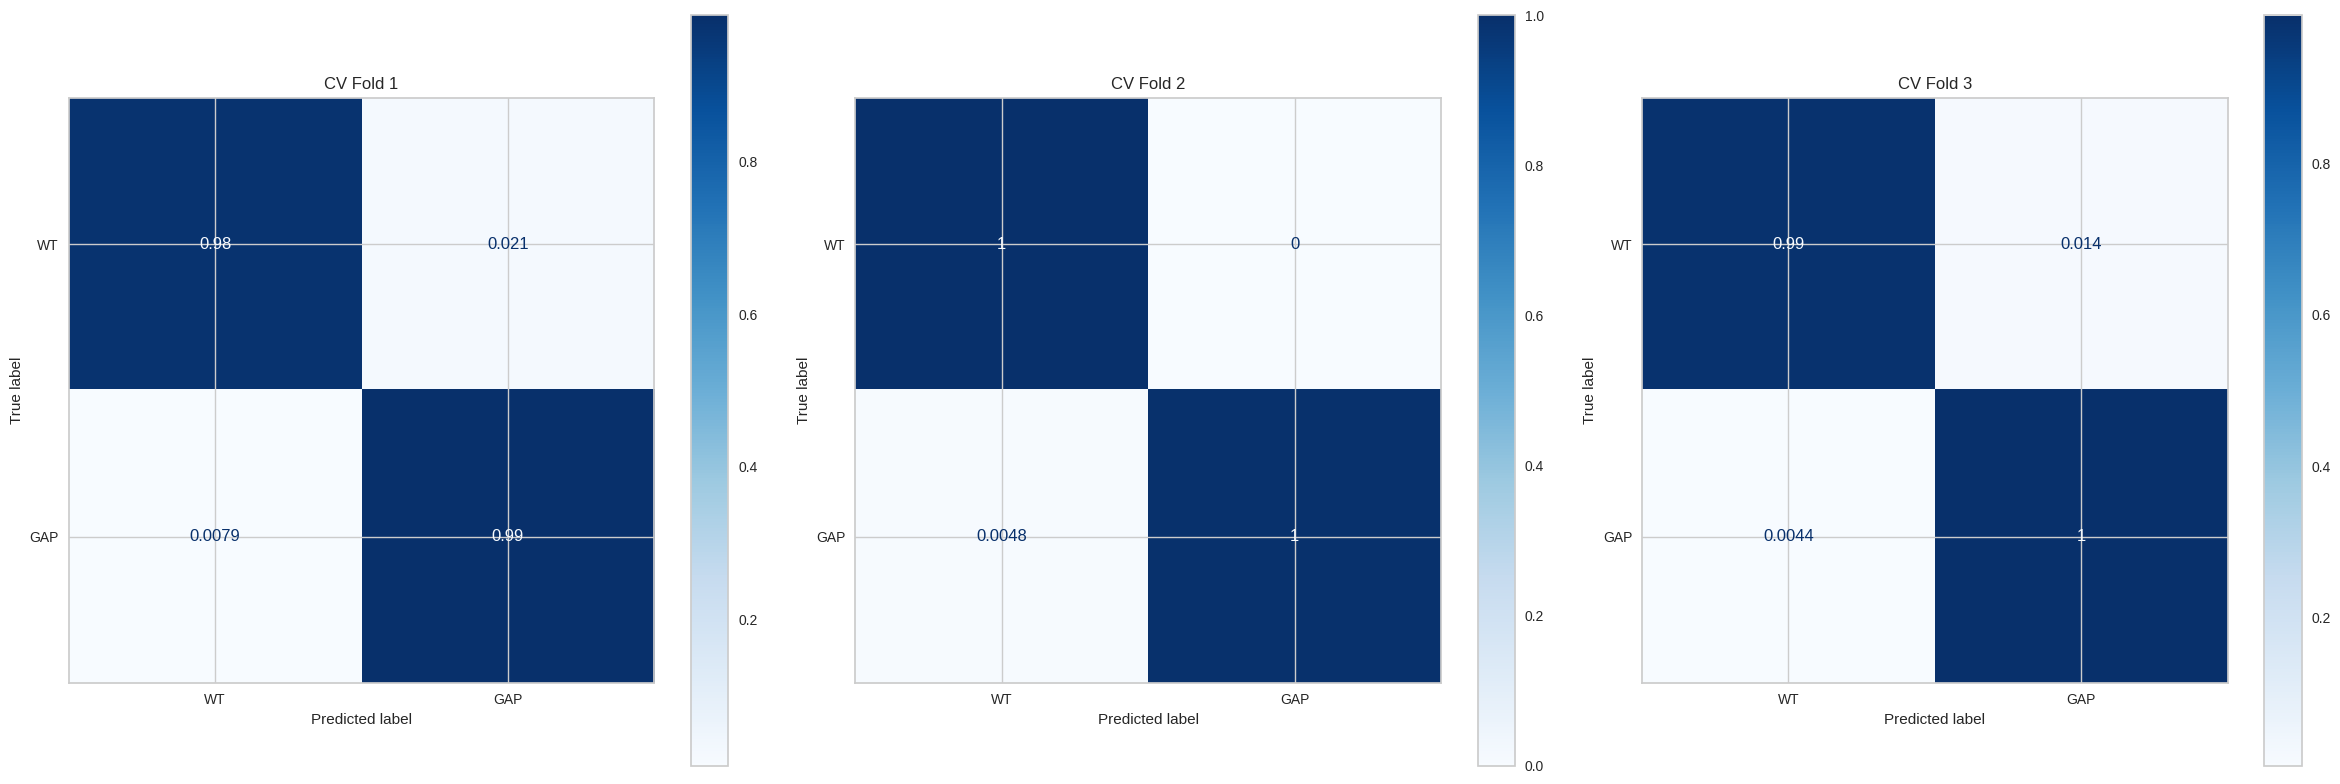

In [23]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Confusion Matrix for CV Fold 1
cm1 = metrics.confusion_matrix(y_train_fold_1, lr_clf.predict(train_fold_1), normalize = 'true')
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['WT', 'GAP'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('CV Fold 1')

# Confusion Matrix for CV Fold 2
cm2 = metrics.confusion_matrix(y_train_fold_2, lr_clf.predict(train_fold_2), normalize = 'true')
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['WT', 'GAP'])
disp2.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('CV Fold 2')

# Confusion Matrix for CV Fold 3
cm3 = metrics.confusion_matrix(y_train_fold_3, lr_clf.predict(train_fold_3), normalize = 'true')
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['WT', 'GAP'])
disp3.plot(ax=axes[2], cmap='Blues')
axes[2].set_title('CV Fold 3')

# Adjust layout
plt.tight_layout()

# Change directory to save the plots
os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/Logistic_Regression')
# Save the plots

plt.savefig('confusion_matrix_cv_folds_normalise.jpg')
plt.savefig('confusion_matrix_cv_folds_normalise.svg')

plt.show()

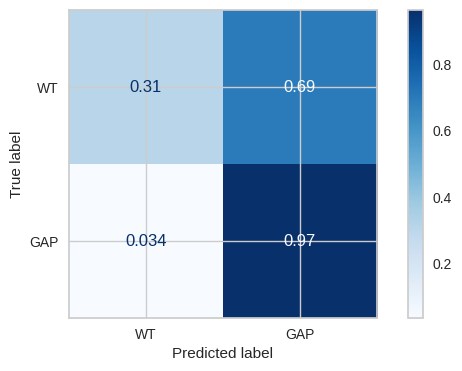

In [24]:
fig, ax = plt.subplots(figsize = (8,4))

cm_test = metrics.confusion_matrix(y_test,  lr_clf.predict(X_test_std_df), normalize = 'true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = ['WT', 'GAP'])
disp.plot(ax = ax, cmap = 'Blues')

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/Logistic_Regression/')
plt.savefig('confusion_matrix_test.jpg')
plt.savefig('confusion_matrix_test.svg')
plt.show()

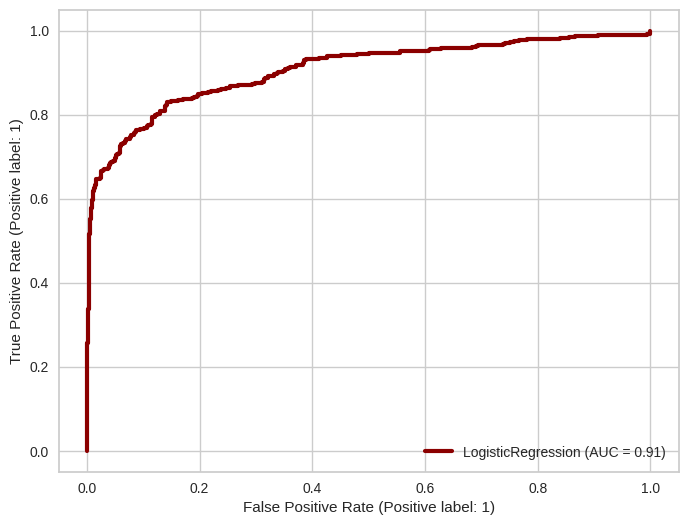

In [21]:
import matplotlib.pyplot as plt
from yellowbrick import classifier
fig, axes = plt.subplots(figsize = (8, 6), ncols = 1)
metrics.RocCurveDisplay.from_estimator(lr_clf, X_test_std_df, y_test, ax = axes, color = 'darkred', linewidth = 3) #, label = 'Test', color='darkred', linewidth=3)

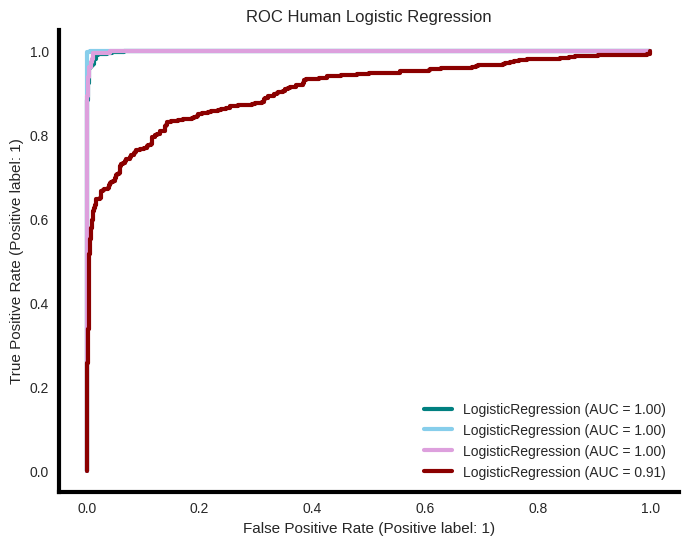

In [25]:
import matplotlib.pyplot as plt
from yellowbrick import classifier
fig, axes = plt.subplots(figsize = (8, 6), ncols = 1)

metrics.RocCurveDisplay.from_estimator(lr_clf, train_fold_1, y_train_fold_1, ax = axes, color = 'teal', linewidth=3) #label = 'CV Fold 1', color = 'teal', linewidth=3)
metrics.RocCurveDisplay.from_estimator(lr_clf, train_fold_2, y_train_fold_2, ax = axes, color = 'skyblue', linewidth=3) #, label = 'CV Fold 2', color = 'skyblue', linewidth=3)
metrics.RocCurveDisplay.from_estimator(lr_clf, train_fold_3, y_train_fold_3, ax = axes, color = 'plum', linewidth=3) #, label = 'CV Fold 3', color = 'plum', linewidth=3)
metrics.RocCurveDisplay.from_estimator(lr_clf, X_test_std_df, y_test, ax = axes, color = 'darkred', linewidth = 3) #, label = 'Test', color='darkred', linewidth=3)
axes.set(title = 'ROC Human Logistic Regression')
axes.grid(False)

# Remove the top and right spines
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Make bottom (X-axis) and left (Y-axis) spines thicker
axes.spines['bottom'].set_linewidth(3)
axes.spines['left'].set_linewidth(3)
axes.spines['bottom'].set_edgecolor('black')
axes.spines['left'].set_edgecolor('black')

# Remove the background grid
axes.grid(False)
# Save the plot as a PNG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/Logistic_Regression/' + 'dec_log_reg_roc_curve_train_test.jpg', format='png')

# Save the plot as an SVG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/Logistic_Regression/' + 'dec_log_reg_roc_curve_train_test.svg', format='svg')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming lr_clf is already defined and trained

def plot_roc_curve(model, X, y, label, ax, color):
    # Predict probabilities
    y_scores = model.predict_proba(X)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot
    ax.plot(fpr, tpr, color=color, lw=2, label=f'{label} (area = {roc_auc:.2f})')

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC curve for each fold and test set
plot_roc_curve(lr_clf, train_fold_1, y_train_fold_1, 'CV Fold 1', ax, 'teal')
plot_roc_curve(lr_clf, train_fold_2, y_train_fold_2, 'CV Fold 2', ax, 'skyblue')
plot_roc_curve(lr_clf, train_fold_3, y_train_fold_3, 'CV Fold 3', ax, 'plum')
plot_roc_curve(lr_clf, X_test_std_df, y_test, 'Test', ax, 'darkred')

# Additional plot formatting
ax.set_title('ROC Human Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
ax.grid(False)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make bottom (X-axis) and left (Y-axis) spines thicker
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_edgecolor('black')
ax.spines['left'].set_edgecolor('black')

# Save and show the plot
#plt.savefig('/path/to/save/roc_curve.jpg', format='jpg')
#plt.show()


## Predictions per patient 

In [30]:
pred_train = lr_clf.predict(X_train_std_df)
copy_X_train = X_train_res.copy()
copy_X_train["pred"] = pred_train

In [31]:
count_matches = copy_X_train['Genotype'].eq(copy_X_train['pred']).groupby(copy_X_train['Patient_ID']).sum()

print(count_matches / copy_X_train.groupby("Patient_ID").count()["Genotype"])

Patient_ID
P10    0.996700
P16    1.000000
P17    1.000000
P20    0.979487
P21    1.000000
P24    1.000000
P26    0.989437
P27    0.935000
P28    0.986143
P5     0.997214
P6     1.000000
dtype: float64


In [32]:
pred_test = lr_clf.predict(X_test_std_df)
copy_X_test= X_test.copy()
copy_X_test["pred"] = pred_test

count_matches = copy_X_test['Genotype'].eq(copy_X_test['pred']).groupby(copy_X_test['Patient_ID']).sum()

print(count_matches / copy_X_test.groupby("Patient_ID").count()["Genotype"])

Patient_ID
P1    0.305503
P7    0.966292
dtype: float64
